

# Project: Investigate No-show Appointments Dataset 

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> This dataset provides information about 100k medical appointments in Brazil and is focused on the question of whether or not patients show up for their appointment. Several characteristics about the patient are included in each row.
> These are some questions we will try to answer them:
<li> (1) what is the proportion of females versus males?</li>
<li> (2) What is the proportion of appointment show-up versus no shows?</li>
<li>(3) Which gender of patients show up less for their scheduled appointments?</li>
<li> (4) Does sending an SMS reminder help to reduce the no-shows?</li>
<li> (5) Is there an assosiation between Scholarship and the no-shows?</li>

In [80]:
# import the packages we need
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling


### General Properties

In [81]:
# Load the data and print out a few lines. 
df = pd.read_csv('Database_No_show_appointments//noshowappointments-kagglev2-may-2016.csv')
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [82]:
# show the dataset dimensions
df.shape

(110527, 14)

The data contain 110527 rows and 14 column

In [83]:
# get the summary of the dataset 
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [84]:
# show data type of each column and if there is null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


The ScheduledDay and AppointmentDay has incorrect types, so we will convert them to datetime type

In [85]:
# Convert ScheduledDay to datetime type
df['ScheduledDay'] = pd.to_datetime(df['ScheduledDay'])
# Convert AppointmentDay to datetime type
df['AppointmentDay'] = pd.to_datetime(df['AppointmentDay'])

In [86]:
# show data type of each column again
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null datetime64[ns]
AppointmentDay    110527 non-null datetime64[ns]
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: datetime64[ns](2), float64(1), int64(8), object(3)
memory usage: 11.8+ MB


There is no missing values in the dataset because all the nun-null values are the same of the number of entries (110527) 
and we can also check for null values using the following code

In [87]:
# check for the Nan values
df.isnull().sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

In [88]:
# check for duplicate records
df.duplicated().sum()

0

There is no duplicated records



### Data Cleaning 

The summury of the data shows that the minimum value of the age is (-1), so we will investigate the age column 

In [89]:
# explore the age value counts
df['Age'].value_counts()

 0      3539
 1      2273
 52     1746
 49     1652
 53     1651
 56     1635
 38     1629
 59     1624
 2      1618
 50     1613
 57     1603
 36     1580
 51     1567
 19     1545
 39     1536
 37     1533
 54     1530
 34     1526
 33     1524
 30     1521
 6      1521
 3      1513
 17     1509
 32     1505
 5      1489
 44     1487
 18     1487
 58     1469
 46     1460
 45     1453
        ... 
 74      602
 76      571
 75      544
 78      541
 77      527
 80      511
 81      434
 82      392
 79      390
 84      311
 83      280
 85      275
 86      260
 87      184
 89      173
 88      126
 90      109
 92       86
 91       66
 93       53
 94       33
 95       24
 96       17
 97       11
 98        6
 115       5
 100       4
 102       2
 99        1
-1         1
Name: Age, Length: 104, dtype: int64

There is 1 row which must be treated. We will replace this age (-1) with the age's mean. 

In [90]:
# replace the row containing (-1) in age with the age mean
df['Age'].replace({-1: df['Age'].mean()}, inplace=True)

There are some mistakes in columns' labels which have to be treated

In [91]:
# renaming typo mistakes in columns' labels
df.rename(columns={'Hipertension': 'Hypertension', 'Handcap': 'Handicap', 'No-show': 'No_Show'}, inplace=True)

In [92]:
# show the first 5 rows of the data and its labels
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No_Show
0,2.987250e+13,5642903,F,2016-04-29 18:38:08,2016-04-29,62.0,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29 16:08:27,2016-04-29,56.0,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29 16:19:04,2016-04-29,62.0,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29 17:29:31,2016-04-29,8.0,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29 16:07:23,2016-04-29,56.0,JARDIM DA PENHA,0,1,1,0,0,0,No


<a id='eda'></a>
## Exploratory Data Analysis

> After cleaning the dataset, we will try to answer our questions.

### Research Question 1 ( what is the proportion of females versus males?)

In [93]:
# count the number of males and femals and then calculate its proportion
print(df.Gender.value_counts())
print(round(df.Gender.value_counts()/len(df)*100))

F    71840
M    38687
Name: Gender, dtype: int64
F    65.0
M    35.0
Name: Gender, dtype: float64


There are 71840 female which represents 65% of the dataset and 38687 male which represents 35% of the dataset.
The following bar chart shows the female versus male value counts.

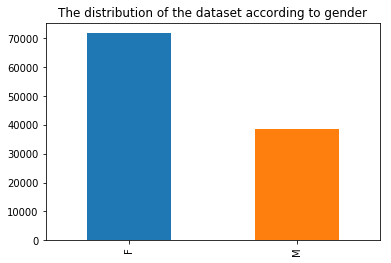

In [94]:
# ploting a bar chart for ender
df.Gender.value_counts().plot(kind="bar")
plt.title("The distribution of the dataset according to gender");

The bar chart show that the females are approximately twice more than males.

### Research Question 2 ( What is the proportion of appointment show-up versus no shows?)

In [95]:
# count the number patients who show and did not show then calculate its proportion
print(df.No_Show.value_counts())
print(round(df.No_Show.value_counts()/len(df)*100))

No     88208
Yes    22319
Name: No_Show, dtype: int64
No     80.0
Yes    20.0
Name: No_Show, dtype: float64


There are 88208 patients showed up to their appointment which represents 80% of the dataset
and 22319 patients didn't show up which represents 20% of the dataset.
The following bar chart shows the No_Show versus Show value counts.

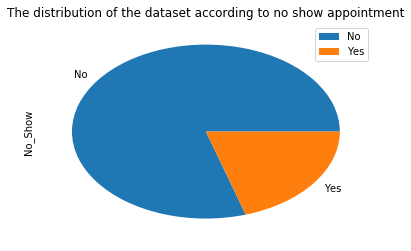

In [96]:
df.No_Show.value_counts().plot(kind="pie")
plt.title("The distribution of the dataset according to no show appointment");
plt.legend();

The pie chart shows that the patients showed up to their appointment are approximately 4 times more than patients didn't show up.

### Research Question 3 ( Which gender of patients show up less for their scheduled appointments?)

We first explore how many females and males who showed up and then calculate the ratio of showing up for each gender

In [97]:
# grouping the patients who showed up or not according to gender
gender_no_show = df.groupby('Gender')['No_Show'].value_counts()
gender_no_show

Gender  No_Show
F       No         57246
        Yes        14594
M       No         30962
        Yes         7725
Name: No_Show, dtype: int64

In [98]:
# calculate the ratio of females who showed up from the whole females
F_ratio = round(gender_no_show[0]/(gender_no_show[0]+gender_no_show[1])*100)
F_ratio

80.0

In [99]:
# calculate the ratio of males who showed up from the whole males
M_ratio = round(gender_no_show[2]/(gender_no_show[2]+gender_no_show[3])*100)
M_ratio

80.0

The ratio of females are approximately the same of the ratio of males who showed up.
we can show that by plotting the following bar chart.

In [100]:
# define a function that help us explore the relation between No show appointment and any other variable by plotting them
def value_counts_plot(df, x_var):
    # plot
    df.groupby([x_var])['No_Show'].value_counts(normalize=True).mul(100).unstack('No_Show').plot(kind='bar');
    # The title of the plot
    plt.title(f"Patients who show up or not according to {x_var}".title());
    # X axis label
    plt.xlabel(x_var.title());
    # y axis label
    plt.ylabel("Percentage".title());

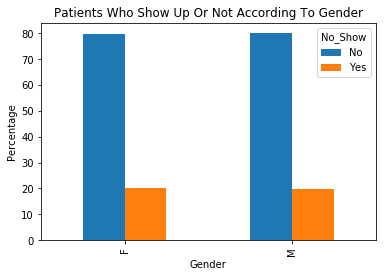

In [101]:
# plot a bar chart for patients who show up or not according to gender
value_counts_plot(df, 'Gender')

The bar chart show that the proportion of females and males who showed up and who did not show up are approximately the same.

### Research Question 4 ( Does sending an SMS reminder help to reduce the no-shows?)

We group the patients who showed up or not according to the SMS reminder.

In [102]:
# grouping the patients who showed up or not according to SMS reminder
sms_no_show = df.groupby('SMS_received')['No_Show'].value_counts()
print(sms_no_show)

SMS_received  No_Show
0             No         62510
              Yes        12535
1             No         25698
              Yes         9784
Name: No_Show, dtype: int64


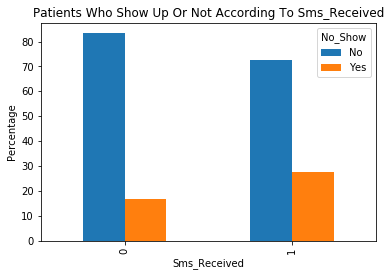

In [103]:
# plot a bar chart to show the relation between showing up and recieving an SMS
value_counts_plot(df, 'SMS_received')

The percent of patients who did not show up and recievied an SMS is more than the percent of patients who showed up and recievied an SMS. This means that Sending an SMS reminder does not help to reduce the no-shows appointments.

### Research Question 5 ( Is there an assosiation between Scholarship and the no-shows?)

We group the patients who showed up or not according to Scholarship.

In [104]:
# grouping the patients who showed up or not according to Scholarship
Scholarship_no_show = df.groupby('Scholarship')['No_Show'].value_counts()
print(Scholarship_no_show)

Scholarship  No_Show
0            No         79925
             Yes        19741
1            No          8283
             Yes         2578
Name: No_Show, dtype: int64


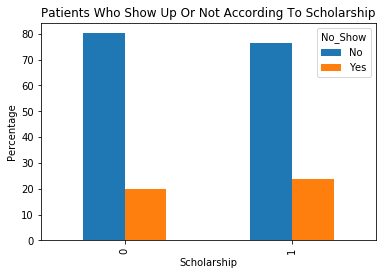

In [105]:
# plot a bar chart to show the relation between showing up and Scholarship
value_counts_plot(df, 'Scholarship')

The percent of patients who did not show up and have Scholarship is more than the percent of patients who showed up and have Scholarship. This means that there is no assosiation between having a scholarship and the no-shows appointments.

<a id='conclusions'></a>
## Conclusions

> We load the packages we need and read the dadaset of No-show Appointments Dataset. We explore the dataset dimentions and describtion. We clean the dataset and start to find answers for our fifth questions. These answers are: There are 71840 female which represents 65% of the dataset and 38687 male which represents 35% of the dataset. There are 88208 patients showed up to their appointment which represents 80% of the dataset and 22319 patients didn't show up which represents 20% of the dataset. The ratio of females are approximately the same of the ratio of males who showed up. Sending an SMS reminder does not help to reduce the no-shows appointments. There is no assosiation between having a scholarship and the no-shows appointments.

<a id='Limitations'></a>
>Limitations:
the data should contain more effective variables such as the distance between the patient and the place of the appointment, the cost to be paid by the patient would pay, patient's income, and the number of the patient's family members.

In [ ]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])